In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('output.csv', sep=';')

df['Tempo'] = df['Tempo']*1000

df['Entrada'] = df['Entrada'].astype(str)

# Display the first few rows of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Método    1440 non-null   object 
 1   Entrada   1440 non-null   object 
 2   Tempo     1440 non-null   float64
 3   Execução  1440 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 45.1+ KB


In [81]:


def determinar_tipo(x):
    if x.startswith('a'):
        return 'Aleatorio'
    elif x.startswith('d'):
        return 'Decrescente'
    elif x.startswith('o'):
        return 'Ordenado'
    elif x.startswith('p'):
        return 'Preordenado'
    else:
        return 'Outro'

df['TipoOrdenacao'] = df['Entrada'].apply(determinar_tipo)


def remove(x):
    if x.startswith('a'):
        return x[1:]
    elif x.startswith('d'):
        return x[1:]
    elif x.startswith('o'):
        return x[1:]
    elif x.startswith('po'):
        return x[2:]
    else:
        return 'Outro'

df['N'] = df['Entrada'].apply(remove).astype(int)
df.info()


print(df['TipoOrdenacao'].value_counts())

#df.to_csv('processed_output.csv', sep=';', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Método         1440 non-null   object 
 1   Entrada        1440 non-null   object 
 2   Tempo          1440 non-null   float64
 3   Execução       1440 non-null   int64  
 4   TipoOrdenacao  1440 non-null   object 
 5   N              1440 non-null   int32  
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 62.0+ KB
TipoOrdenacao
Aleatorio      360
Decrescente    360
Ordenado       360
Preordenado    360
Name: count, dtype: int64


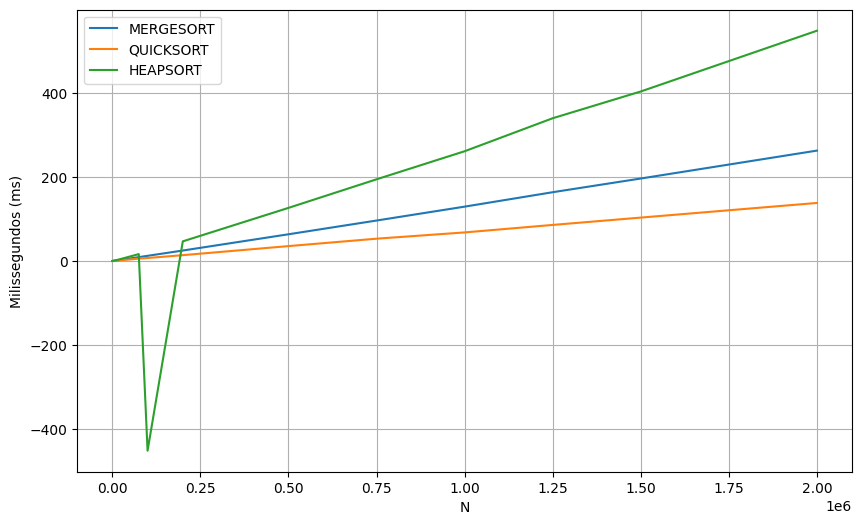

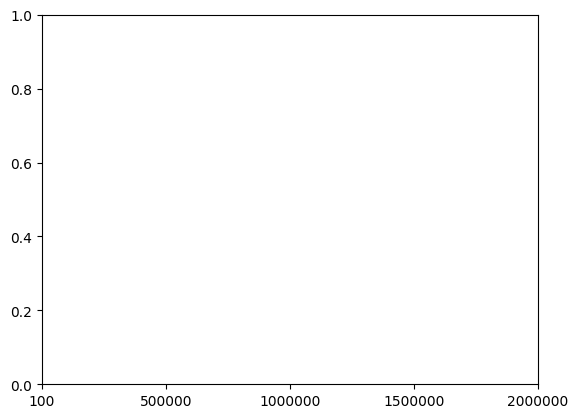

In [82]:
dfAleatorio = df.loc[df['TipoOrdenacao'] == 'Aleatorio']

#dfAleatorio.to_csv('dfAleatorio.csv', sep=';', index=False)

dfMergeAleatorio = dfAleatorio[dfAleatorio['Método'] == 'MERGESORT']
dfQuickAleatorio = dfAleatorio[dfAleatorio['Método'] == 'QUICKSORT']
dfHeapAleatorio = dfAleatorio[dfAleatorio['Método'] == 'HEAPSORT']

dfMergeAleatorio_grouped = dfMergeAleatorio.groupby('N')['Tempo'].mean()
dfQuickAleatorio_grouped = dfQuickAleatorio.groupby('N')['Tempo'].mean()
dfHeapAleatorio_grouped = dfHeapAleatorio.groupby('N')['Tempo'].mean()

# Calculando os intervalos de 25% do range de N
n_min = dfMergeAleatorio_grouped.index.min()
n_max = dfMergeAleatorio_grouped.index.max()
xticks_values = [n_min + (n_max - n_min) * i / 4 for i in range(5)]  # A cada 25%

# Encontrando os valores mais próximos de xticks_values no índice de dfMergeAleatorio_grouped
xticks_labels = [dfMergeAleatorio_grouped.index[np.abs(dfMergeAleatorio_grouped.index - xt).argmin()] for xt in xticks_values]

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(dfMergeAleatorio_grouped.index, dfMergeAleatorio_grouped.values, label='MERGESORT')
plt.plot(dfQuickAleatorio_grouped.index, dfQuickAleatorio_grouped.values, label='QUICKSORT')
plt.plot(dfHeapAleatorio_grouped.index, dfHeapAleatorio_grouped.values, label='HEAPSORT')

plt.xlabel('N')
plt.ylabel('Milissegundos (ms)')
#plt.title('Tempo de execução por método de ordenação (Aleatório)')
plt.legend()
plt.grid(True)



dire = 'imagens/' + 'Aleatorio' 
plt.savefig(dire)

plt.show()

# Definindo os xticks a cada 25% do intervalo de N e com os labels de acordo com o índice
plt.xticks(xticks_values, xticks_labels)

plt.show()


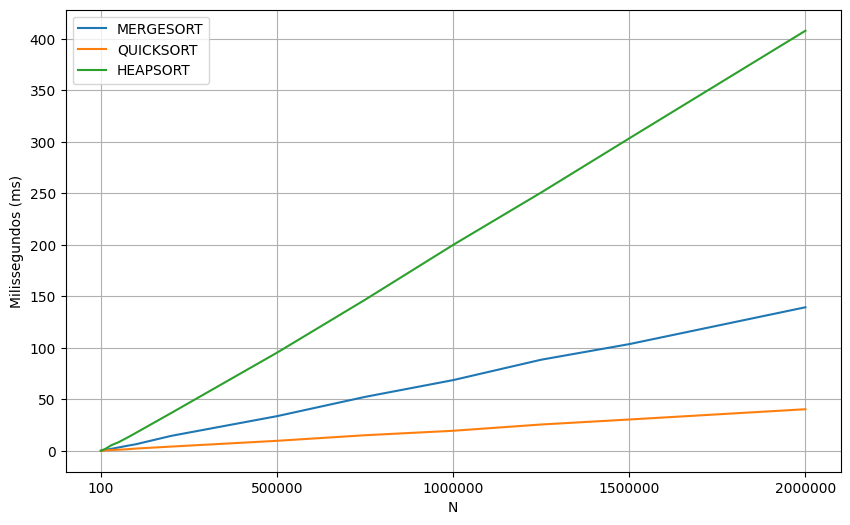

In [83]:
dfDecrescente = df.loc[df['TipoOrdenacao'] == 'Decrescente']

#dfDecrescente.to_csv('dfDecrescente.csv', sep=';', index=False)

dfMergeDecrescente = dfDecrescente[dfDecrescente['Método'] == 'MERGESORT']
dfQuickDecrescente = dfDecrescente[dfDecrescente['Método'] == 'QUICKSORT']
dfHeapDecrescente = dfDecrescente[dfDecrescente['Método'] == 'HEAPSORT']

dfMergeDecrescente_grouped = dfMergeDecrescente.groupby('N')['Tempo'].mean()
dfQuickDecrescente_grouped = dfQuickDecrescente.groupby('N')['Tempo'].mean()
dfHeapDecrescente_grouped = dfHeapDecrescente.groupby('N')['Tempo'].mean()

# Calculando os intervalos de 25% do range de N
n_min = dfMergeDecrescente_grouped.index.min()
n_max = dfMergeDecrescente_grouped.index.max()
xticks_values = [n_min + (n_max - n_min) * i / 4 for i in range(5)]  # A cada 25%

# Encontrando os valores mais próximos de xticks_values no índice de dfMergeDecrescente_grouped
xticks_labels = [dfMergeDecrescente_grouped.index[np.abs(dfMergeDecrescente_grouped.index - xt).argmin()] for xt in xticks_values]

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(dfMergeDecrescente_grouped.index, dfMergeDecrescente_grouped.values, label='MERGESORT')
plt.plot(dfQuickDecrescente_grouped.index, dfQuickDecrescente_grouped.values, label='QUICKSORT')
plt.plot(dfHeapDecrescente_grouped.index, dfHeapDecrescente_grouped.values, label='HEAPSORT')

plt.xlabel('N')
plt.ylabel('Milissegundos (ms)')
#plt.title('Tempo de execução por método de ordenação (Decrescente)')
plt.legend()
plt.grid(True)

# Definindo os xticks a cada 25% do intervalo de N e com os labels de acordo com o índice
plt.xticks(xticks_values, xticks_labels)


dire = 'imagens/' + 'Decrescente' 
plt.savefig(dire)

plt.show()


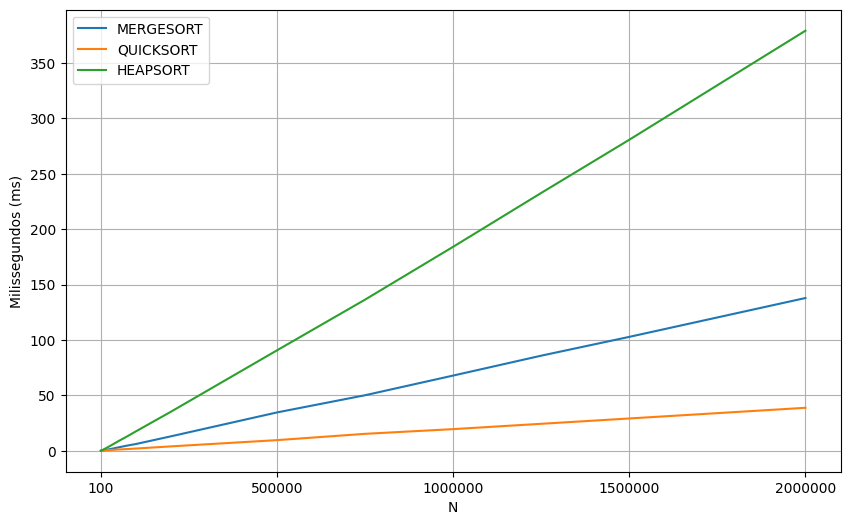

In [84]:
dfPreOrdenado = df.loc[df['TipoOrdenacao'] == 'Preordenado']

#dfPreOrdenado.to_csv('dfPreOrdenado.csv', sep=';', index=False)

dfMergePreOrdenado = dfPreOrdenado[dfPreOrdenado['Método'] == 'MERGESORT']
dfQuickPreOrdenado = dfPreOrdenado[dfPreOrdenado['Método'] == 'QUICKSORT']
dfHeapPreOrdenado = dfPreOrdenado[dfPreOrdenado['Método'] == 'HEAPSORT']

dfMergePreOrdenado_grouped = dfMergePreOrdenado.groupby('N')['Tempo'].mean()
dfQuickPreOrdenado_grouped = dfQuickPreOrdenado.groupby('N')['Tempo'].mean()
dfHeapPreOrdenado_grouped = dfHeapPreOrdenado.groupby('N')['Tempo'].mean()

# Calculando os intervalos de 25% do range de N
n_min = dfMergePreOrdenado_grouped.index.min()
n_max = dfMergePreOrdenado_grouped.index.max()
xticks_values = [n_min + (n_max - n_min) * i / 4 for i in range(5)]  # A cada 25%

# Encontrando os valores mais próximos de xticks_values no índice de dfMergePreOrdenado_grouped
xticks_labels = [dfMergePreOrdenado_grouped.index[np.abs(dfMergePreOrdenado_grouped.index - xt).argmin()] for xt in xticks_values]

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(dfMergePreOrdenado_grouped.index, dfMergePreOrdenado_grouped.values, label='MERGESORT')
plt.plot(dfQuickPreOrdenado_grouped.index, dfQuickPreOrdenado_grouped.values, label='QUICKSORT')
plt.plot(dfHeapPreOrdenado_grouped.index, dfHeapPreOrdenado_grouped.values, label='HEAPSORT')

plt.xlabel('N')
plt.ylabel('Milissegundos (ms)')
#plt.title('Tempo de execução por método de ordenação (Parcialmente Ordenado)')
plt.legend()
plt.grid(True)

# Definindo os xticks a cada 25% do intervalo de N e com os labels de acordo com o índice
plt.xticks(xticks_values, xticks_labels)

dire = 'imagens/' + 'ParicalmenteOrdenado' 
plt.savefig(dire)

plt.show()


N
100          0.006548
200          0.010813
500          0.024088
1000         0.047921
2000         0.095316
5000         0.257809
7500         0.395808
10000        0.547988
15000        0.825210
30000        1.653843
50000        2.862730
75000        4.569775
100000       6.254973
200000      13.007117
500000      32.920017
750000      50.062250
1000000     67.350633
1250000     86.686167
1500000    103.096167
2000000    138.304667
Name: Tempo, dtype: float64

N
100          0.008124
200          0.017270
500          0.052640
1000         0.114409
2000         0.253329
5000         0.719143
7500         1.113917
10000        1.514410
15000        2.348188
30000        4.985690
50000        8.690342
75000       13.244483
100000      17.896050
200000      35.140150
500000      89.820467
750000     136.263333
1000000    185.300833
1250000    234.093000
1500000    280.703667
2000000    380.597000
Name: Tempo, dtype: float64

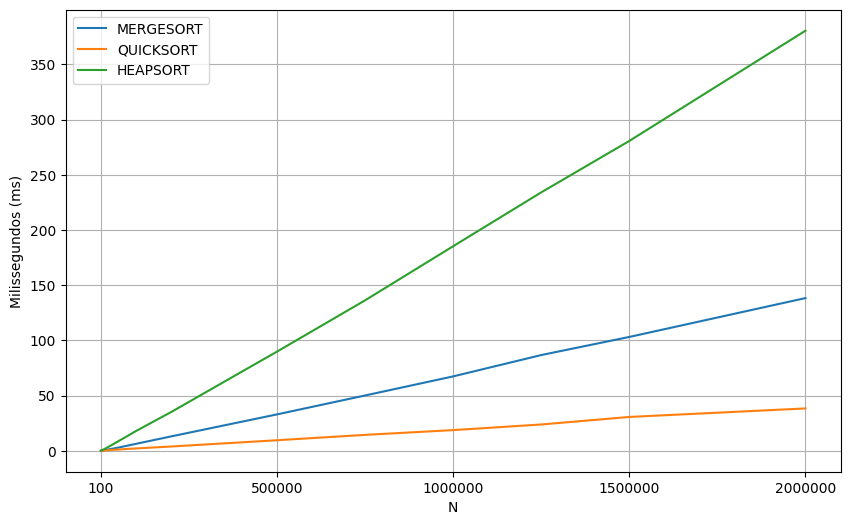

In [85]:
dfOrdenado = df.loc[df['TipoOrdenacao'] == 'Ordenado']

#dfOrdenado.to_csv('dfOrdenado.csv', sep=';', index=False)

dfMergeOrdenado = dfOrdenado[dfOrdenado['Método'] == 'MERGESORT']
dfQuickOrdenado = dfOrdenado[dfOrdenado['Método'] == 'QUICKSORT']
dfHeapOrdenado = dfOrdenado[dfOrdenado['Método'] == 'HEAPSORT']

dfMergeOrdenado_grouped = dfMergeOrdenado.groupby('N')['Tempo'].mean()



dfQuickOrdenado_grouped = dfQuickOrdenado.groupby('N')['Tempo'].mean()
dfHeapOrdenado_grouped = dfHeapOrdenado.groupby('N')['Tempo'].mean()

display(dfMergeOrdenado_grouped)
display(dfHeapOrdenado_grouped)

# Calculando os intervalos de 25% do range de N
n_min = dfMergeOrdenado_grouped.index.min()
n_max = dfMergeOrdenado_grouped.index.max()
xticks_values = [n_min + (n_max - n_min) * i / 4 for i in range(5)]  # A cada 25%

# Encontrando os valores mais próximos de xticks_values no índice de dfMergeOrdenado_grouped
xticks_labels = [dfMergeOrdenado_grouped.index[np.abs(dfMergeOrdenado_grouped.index - xt).argmin()] for xt in xticks_values]

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(dfMergeOrdenado_grouped.index, dfMergeOrdenado_grouped.values, label='MERGESORT')
plt.plot(dfQuickOrdenado_grouped.index, dfQuickOrdenado_grouped.values, label='QUICKSORT')
plt.plot(dfHeapOrdenado_grouped.index, dfHeapOrdenado_grouped.values, label='HEAPSORT')
plt.xlabel('N')
plt.ylabel('Milissegundos (ms)')
#plt.title('Tempo de execução por método de ordenação (Ordenado)')
plt.legend()
plt.grid(True)

# Definindo os xticks a cada 25% do intervalo de N e com os labels de acordo com o índice
plt.xticks(xticks_values, xticks_labels)

dire = 'imagens/' + 'Ordenado' 
plt.savefig(dire)


plt.show()


## POR CONJUNTO 

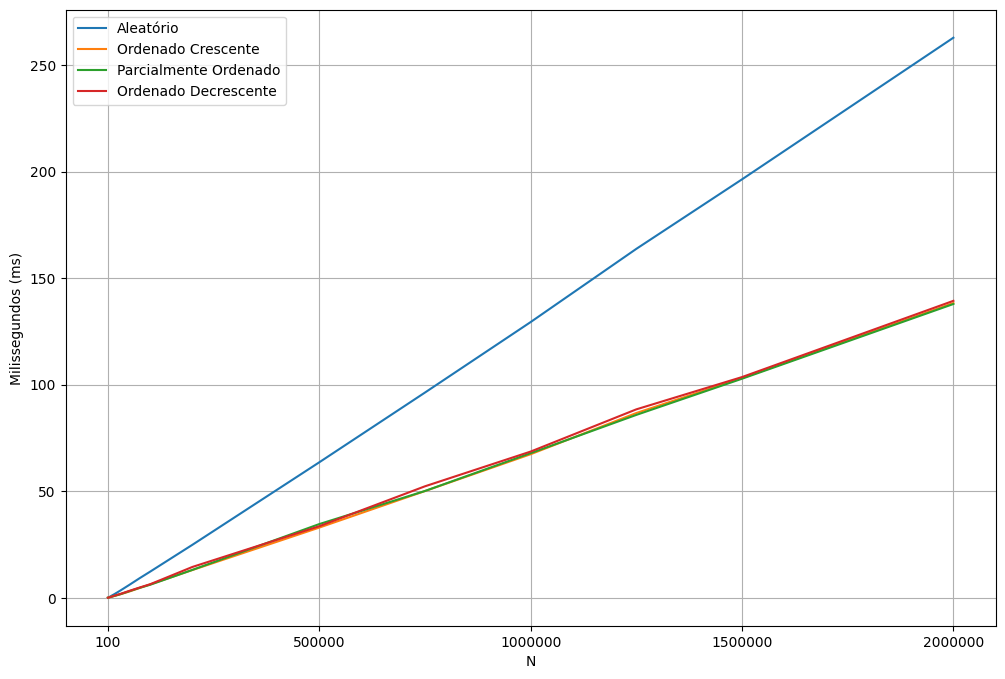

In [86]:
df_combined = pd.DataFrame({
  'N': dfMergeAleatorio_grouped.index,
  'Tempo_Aleatorio': dfMergeAleatorio_grouped.values,
  'Tempo_OrdenadoCrescente': dfMergeOrdenado_grouped.values,
  'Tempo_ParcialmenteOrdenado': dfMergePreOrdenado_grouped.values,
  'Tempo_OrdenadoDecrescente': dfMergeDecrescente_grouped.values
})

#df_combined.to_csv('df_combined.csv', sep=';', index=False)

# Encontrando os valores mais próximos de xticks_values no índice de dfMergeOrdenado_grouped
xticks_labels = [dfMergeOrdenado_grouped.index[np.abs(dfMergeOrdenado_grouped.index - xt).argmin()] for xt in xticks_values]

plt.figure(figsize=(12, 8))
plt.plot(df_combined['N'], df_combined['Tempo_Aleatorio'], label='Aleatório')
plt.plot(df_combined['N'], df_combined['Tempo_OrdenadoCrescente'], label='Ordenado Crescente')
plt.plot(df_combined['N'], df_combined['Tempo_ParcialmenteOrdenado'], label='Parcialmente Ordenado')
plt.plot(df_combined['N'], df_combined['Tempo_OrdenadoDecrescente'], label='Ordenado Decrescente')

plt.xlabel('N')
plt.ylabel('Milissegundos (ms)')
#plt.title('Comparação de Tempos de Execução por Tipo de Ordenação')
plt.legend()
plt.grid(True)

# Definindo os xticks a cada 25% do intervalo de N e com os labels de acordo com o índice
plt.xticks(xticks_values, xticks_labels)

dire = 'imagens/' + 'MergeConjuntos' 
plt.savefig(dire)
plt.show()

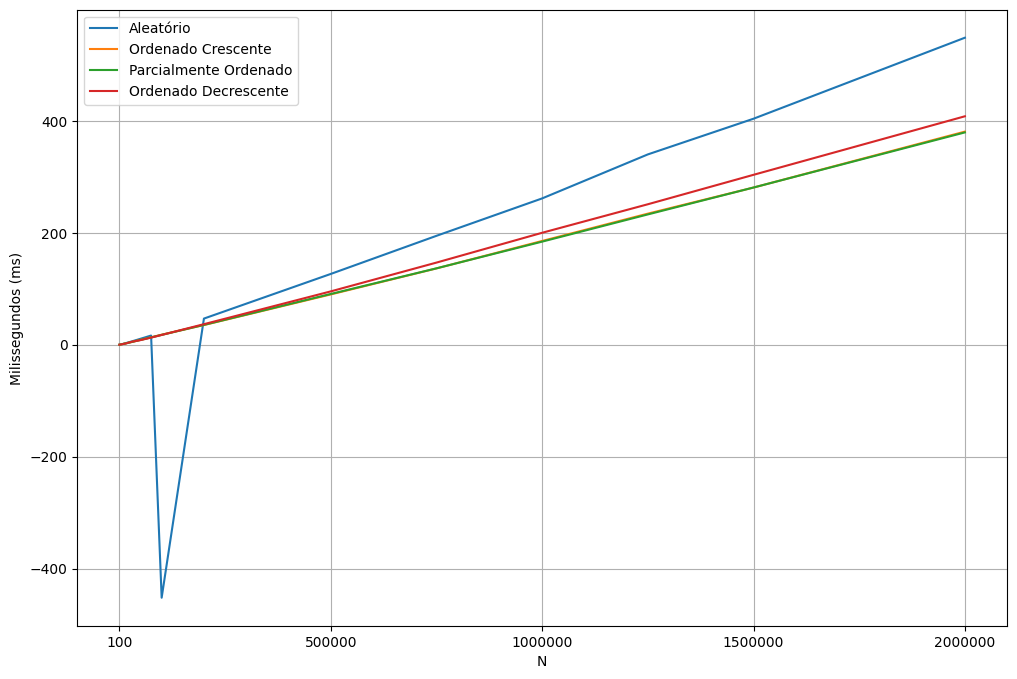

In [87]:
df_combined = pd.DataFrame({
  'N': dfHeapAleatorio_grouped.index,
  'Tempo_Aleatorio': dfHeapAleatorio_grouped.values,
  'Tempo_OrdenadoCrescente': dfHeapOrdenado_grouped.values,
  'Tempo_ParcialmenteOrdenado': dfHeapPreOrdenado_grouped.values,
  'Tempo_OrdenadoDecrescente': dfHeapDecrescente_grouped.values
})

#df_combined.to_csv('df_combined.csv', sep=';', index=False)

# Encontrando os valores mais próximos de xticks_values no índice de dfMergeOrdenado_grouped
xticks_labels = [dfMergeOrdenado_grouped.index[np.abs(dfMergeOrdenado_grouped.index - xt).argmin()] for xt in xticks_values]

plt.figure(figsize=(12, 8))
plt.plot(df_combined['N'], df_combined['Tempo_Aleatorio'], label='Aleatório')
plt.plot(df_combined['N'], df_combined['Tempo_OrdenadoCrescente'], label='Ordenado Crescente')
plt.plot(df_combined['N'], df_combined['Tempo_ParcialmenteOrdenado'], label='Parcialmente Ordenado')
plt.plot(df_combined['N'], df_combined['Tempo_OrdenadoDecrescente'], label='Ordenado Decrescente')

plt.xlabel('N')
plt.ylabel('Milissegundos (ms)')
#plt.title('Comparação de Tempos de Execução por Tipo de Ordenação')
plt.legend()
plt.grid(True)

# Definindo os xticks a cada 25% do intervalo de N e com os labels de acordo com o índice
plt.xticks(xticks_values, xticks_labels)

dire = 'imagens/' + 'heapConjuntos' 
plt.savefig(dire)

plt.show()

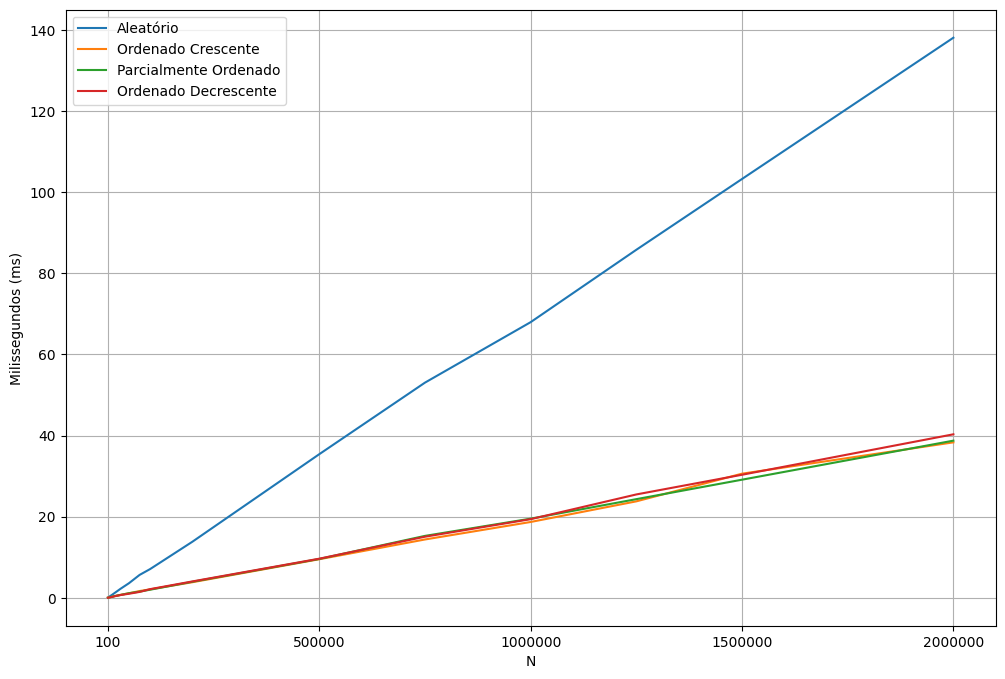

In [88]:
df_combined = pd.DataFrame({
  'N': dfQuickAleatorio_grouped.index,
  'Tempo_Aleatorio': dfQuickAleatorio_grouped.values,
  'Tempo_OrdenadoCrescente': dfQuickOrdenado_grouped.values,
  'Tempo_ParcialmenteOrdenado': dfQuickPreOrdenado_grouped.values,
  'Tempo_OrdenadoDecrescente': dfQuickDecrescente_grouped.values
})

#df_combined.to_csv('df_combined.csv', sep=';', index=False)

# Encontrando os valores mais próximos de xticks_values no índice de dfMergeOrdenado_grouped
xticks_labels = [dfMergeOrdenado_grouped.index[np.abs(dfMergeOrdenado_grouped.index - xt).argmin()] for xt in xticks_values]

plt.figure(figsize=(12, 8))
plt.plot(df_combined['N'], df_combined['Tempo_Aleatorio'], label='Aleatório')
plt.plot(df_combined['N'], df_combined['Tempo_OrdenadoCrescente'], label='Ordenado Crescente')
plt.plot(df_combined['N'], df_combined['Tempo_ParcialmenteOrdenado'], label='Parcialmente Ordenado')
plt.plot(df_combined['N'], df_combined['Tempo_OrdenadoDecrescente'], label='Ordenado Decrescente')

plt.xlabel('N')
plt.ylabel('Milissegundos (ms)')
#plt.title('Comparação de Tempos de Execução por Tipo de Ordenação')
plt.legend()
plt.grid(True)

# Definindo os xticks a cada 25% do intervalo de N e com os labels de acordo com o índice
plt.xticks(xticks_values, xticks_labels)

dire = 'imagens/' + 'QuickConjuntos' 
plt.savefig(dire)

plt.show()